# Case 1. Heart Disease Classification
**Neural Networks for Machine Learning Applications**<br>
28.10.2024<br>
**Javier Jorganes**<br>
[Information Technology, Bachelor's Degree](https://www.metropolia.fi/en/academics/bachelors-degrees/information-technology)<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## Acknowledgment

This notebook was created with the guidance and assistance of **OpenAI’s ChatGPT**. The model provided support in understanding concepts, coding assistance, and helped with explanations to improve clarity throughout the notebook. **All final code, analysis, and conclusions are my own, based on the learning and insights gained during this process.**


## 1. Introduction

This document outlines the process of building a dense neural network to predict the presence of heart disease using the "Heart Disease Health Indicators Dataset." The main objectives are to preprocess the data, handle class imbalance, split the dataset, build and train a neural network model, and evaluate its performance to achieve high sensitivity without significantly compromising specificity.

## 2. Setup

We'll work with pandas for data handling, numpy for numerical operations, and matplotlib and seaborn for visualization. Additionally, TensorFlow and Keras will be needed for building the neural network.

The %matplotlib inline command is a Jupyter Notebook “magic” command that ensures your plots are displayed directly within the notebook, right below the code cells where you create them.

In [1]:
# Essential libraries
import pandas as pd

# Machine learning and preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# TensorFlow / Keras for neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# To display plots inline
%matplotlib inline


## Step 2: Load and Inspect the Dataset
In this step, we’ll load the dataset and take a look at its structure. This helps us understand the columns, check the data types, and ensure there are no missing values. It will also confirm the target variable (HeartDiseaseorAttack) and show us the range of values in the features.

In [2]:
# Load the dataset
data = pd.read_csv('..\data\heart_disease_data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Get a brief overview of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jorga\AppData\Local\Temp\ipykernel_24168\2876210498.py:2: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv('..\data\heart_disease_data.csv')


   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  I

## Step 3: Preprocess the Data
In this step, we’ll perform a few preprocessing tasks:

Split the data into features (inputs) and the target (output).
Normalize the features so that they’re on a similar scale, which helps the neural network train effectively.
Handle any imbalanced data if necessary, but let’s check the distribution first.
Let’s start with the initial part: separating the features and target variable.

In [3]:
# Define the target variable and features
X = data.drop(columns=['HeartDiseaseorAttack'])  # Features
y = data['HeartDiseaseorAttack']                 # Target


## Step 3 (continued): Check for Imbalance in the Target Variable
Now, let’s check if the target variable HeartDiseaseorAttack is imbalanced, which means we need to see if one class (e.g., having heart disease) has significantly fewer examples than the other (not having heart disease). This can affect model performance, especially in classification tasks.

In [4]:
# Check the distribution of the target variable
print(y.value_counts())

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


The dataset is imbalanced, with significantly more cases labeled as 0 (no heart disease) than 1 (heart disease). This imbalance can lead the model to favor predicting the majority class (no heart disease), which could reduce its sensitivity to detecting actual cases of heart disease.

## Step 3 (continued): Normalize the Features
Normalization scales the features to a standard range, which helps the neural network converge more effectively during training. We’ll use StandardScaler from scikit-learn, which standardizes features by removing the mean and scaling to unit variance.

In [5]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to X and transform it
X_normalized = scaler.fit_transform(X)



### Standardizing Features with `StandardScaler`

#### What is `StandardScaler` Doing?
`StandardScaler` scales each feature so that it has a **mean of 0** and a **standard deviation of 1**. This means each feature follows a standard normal distribution. Scaling helps neural networks learn patterns in the data more efficiently.

#### Why Do We Need This?
Imagine we have two features: **BMI** and **Age**. The **BMI** might range from 15 to 40, while **Age** could range from 0 to 100. These different scales can cause issues for the neural network, as it assumes all features are equally important. Without scaling, features with larger ranges (like **Age**) might influence the model more, even if they're not necessarily more important. Scaling ensures that all features contribute equally.

#### How Does `StandardScaler` Work? (Simple Example)
Let’s say we have a simple dataset with a feature, `Height`, containing values like `[150, 160, 170]`. Here’s how scaling would work:

1. **Compute the Mean**: Suppose the mean height is 160 cm.
2. **Compute the Standard Deviation**: Let’s say the standard deviation is 10 cm.
3. **Scale Each Value**: For each value in `Height`, subtract the mean (160) and divide by the standard deviation (10).

This would result in:
- 150 becoming `(150 - 160) / 10 = -1.0`
- 160 becoming `(160 - 160) / 10 = 0.0`
- 170 becoming `(170 - 160) / 10 = 1.0`

After scaling, the `Height` values are now centered around 0 and are within a similar range, making them easier for the neural network to process.

#### Code Explanation
Here’s how we applied this in our code:

```python
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to X and transform it
X_normalized = scaler.fit_transform(X)
```

- `scaler = StandardScaler()` creates the scaler.
- `scaler.fit_transform(X)` calculates the mean and standard deviation for each feature in `X`, then scales each feature accordingly.
- `X_normalized` is our scaled version of `X`, which is now ready for training the model.


### Step 4: Building the Model
In this step, we’ll create a **basic dense neural network** using Keras’ `Sequential` API. For our classification task, this simple architecture will serve as a good starting point, especially for learning.

#### Model Structure
1. **Define a Sequential Model**: This lets us stack layers in a straightforward way.
2. **Add Layers**:
   - An **input layer** that matches the number of features.
   - One or two **hidden layers** with ReLU activation.
   - An **output layer** with a single neuron and sigmoid activation for binary classification (heart disease presence or not).

#### Model Compilation
We’ll specify the following:
- **Loss**: Use `binary_crossentropy` since this is a binary classification task.
- **Optimizer**: Use `adam`, a reliable default optimizer.
- **Metrics**: Track accuracy during training, and later, we’ll analyze sensitivity and specificity.

In [6]:
# Define the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(16, input_shape=(X_normalized.shape[1],), activation='relu'))

# Second hidden layer (optional, you can experiment with removing it)
model.add(Dense(8, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              
# Display the model summary
model.summary()


c:\Users\jorga\OneDrive - Metropolia Ammattikorkeakoulu Oy\TiVi\HYTE\Neuroverkot\Cases\nnvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

### Model Summary Explanation

Our neural network model has three layers, as shown in the summary:

1. **Layer 1 (Dense with 16 neurons)**: 
   - **Output Shape**: `(None, 16)` indicates that this layer has 16 neurons, each providing an output.
   - **Param #**: 352. This is calculated as `(number of input features * 16) + 16` (for biases). 
   
2. **Layer 2 (Dense with 8 neurons)**:
   - **Output Shape**: `(None, 8)`, representing the 8 neurons in this layer.
   - **Param #**: 136. This is calculated as `(16 * 8) + 8`.

3. **Layer 3 (Dense with 1 neuron)**:
   - **Output Shape**: `(None, 1)`, meaning this layer has 1 neuron, ideal for binary classification output.
   - **Param #**: 9. This is calculated as `(8 * 1) + 1`.

#### Total Parameters
- **Total params**: 497. This is the sum of all parameters in each layer. These parameters are trainable, meaning they’ll be updated during training to minimize the loss function.

This model is now ready for training, where we’ll adjust these weights (parameters) to optimize performance on our dataset.

### Step 5: Splitting Data for Training, Validation, and Testing

To ensure our model is effective and generalizes well, we split our data into three sets:
1. **Training Set**: Used to train the model.
2. **Validation Set**: Used to tune the model and monitor for overfitting during training.
3. **Test Set**: Used only once after training to evaluate final model performance.

Following the **80/20 rule**, we’ll:
1. Split the full dataset into 80% training and 20% testing.
2. Further split the training set into 80% training and 20% validation.



#### Purpose of Each Set
- **Training Set**: Used to adjust the model’s parameters.
- **Validation Set**: Used to tune the model’s hyperparameters and monitor for overfitting.
- **Test Set**: Used only once, after training, to evaluate the model’s final performance.


#### Code for Data Splitting:

In [7]:
# Initial split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Further split training data (80% of total) into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the sizes of each set
print("Training set size (64% of total rows, columns):", X_train.shape)
print("Validation set size (16% of total rows, columns):", X_val.shape)
print("Testing set size (20% of total rows, columns):", X_test.shape)

Training set size (64% of total rows, columns): (162355, 21)
Validation set size (16% of total rows, columns): (40589, 21)
Testing set size (20% of total rows, columns): (50736, 21)


#### Explanation of Each Element

- **`X_train` and `y_train`**:
  - `X` represents the **features** or **inputs** in the dataset (the data used to make predictions).
  - `y` represents the **target** or **output variable** (`HeartDiseaseorAttack`), which we want the model to predict.
  - The **capital letter `X`** conventionally represents a matrix (multiple features), while **`y`** is lowercase because it represents a single vector (single target variable).
  
- **train_test_split**:
  - **`train_test_split(X_normalized, y, test_size=0.2, random_state=42)`**: 
    - This function splits the data into two parts—80% for training and 20% for testing.
    - `test_size=0.2` specifies that 20% of the data should be set aside for testing.
    - `random_state=42` is a fixed seed for the random number generator, ensuring that the split is reproducible (we’ll get the same split every time we run the code). Setting `random_state` is useful for debugging and comparing results.

- **Second `train_test_split`**:
  - We apply `train_test_split` again on the training set to create a **validation set**:
    - **80% of the initial training set** (64% of the original data) is used for actual training.
    - **20% of the initial training set** (16% of the original data) is used for validation.

### Step 6: Training the Model

Now that we’ve split our data, we’ll train the model on the training set and use the validation set to monitor performance. Here are the key components for this step:

1. **Epochs**: The number of times the model will see the entire training set. We’ll start with 20 epochs to keep it simple.
2. **Batch Size**: The number of samples the model sees before updating the weights. Let’s use a batch size of 32.
3. **Verbose**: Set to `0` for clarity, so that we don’t see the output for each epoch.

#### Code for Debugging and Array Conversions Before Actual Training:

In [10]:
import numpy as np
print("X_train type:", type(X_train), "Shape:", X_train.shape)
print("y_train type:", type(y_train), "Shape:", y_train.shape)
print("X_val type:", type(X_val), "Shape:", X_val.shape)
print("y_val type:", type(y_val), "Shape:", y_val.shape)
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_val:", np.unique(y_val))

y_train = y_train.astype(int)
y_val = y_val.astype(int)

# This might be run once, because keras expects NumPy array to work with class_weight in next cell
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()


X_train type: <class 'numpy.ndarray'> Shape: (162355, 21)
y_train type: <class 'pandas.core.series.Series'> Shape: (162355,)
X_val type: <class 'numpy.ndarray'> Shape: (40589, 21)
y_val type: <class 'pandas.core.series.Series'> Shape: (40589,)
Unique values in y_train: [0 1]
Unique values in y_val: [0 1]


### Actual Model Training

In [11]:
from sklearn.utils.class_weight import compute_class_weight


# Ensure y_val labels are integers
y_val = y_val.astype(int)
y_train = y_train.astype(int)


# Calculate class weights based on the integer y_train
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Display the calculated class weights
print("Class Weights:", class_weight_dict)

# Retrain the model with class weights
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,  # Apply the class weights
    verbose=0
)

Class Weights: {0: 0.5522617030974686, 1: 5.283617547513669}


### Explanation of the `model.fit` Code

- **`history = model.fit(...)`**: This line trains the model on the provided data and stores the training history (accuracy and loss for each epoch) in the `history` variable, which can be used to analyze the model’s performance over time.

- **Parameters**:
  - **`X_train, y_train`**: These are the training data and labels, respectively. The model learns patterns from this data to make predictions.
  - **`epochs=20`**: Specifies that the model will go through the entire training data 20 times.
  - **`batch_size=32`**: The model will process the data in batches of 32 samples at a time, which can help with memory efficiency and convergence speed.
  - **`validation_data=(X_val, y_val)`**: This provides the validation data and labels, allowing the model to check its performance on unseen data after each epoch. This helps in monitoring overfitting.
  - **`class_weight=class_weight_dict`**: This applies a weight to each class, with higher weights for underrepresented classes. It helps the model pay more attention to the minority class (heart disease) and improves handling of class imbalance.
  - **`verbose=0`**: Disables detailed output during training, which makes the training process visually cleaner.


### Step 7: Evaluating Training and Validation Performance

To understand how the model performed during training, we’ll look at **accuracy** and **loss curves** over the epochs. This helps us see if the model is learning effectively, and if there’s any overfitting or underfitting.

#### Plotting Accuracy and Loss
Below is the code to plot the training and validation accuracy, as well as the training and validation loss over each epoch.

#### Explanation
- **Training vs. Validation Accuracy**: Shows how well the model is predicting on both the training and validation sets.
  - If training accuracy is much higher than validation accuracy, the model might be overfitting.
- **Training vs. Validation Loss**: Indicates how well the model’s predictions align with the actual values.
  - A sharp decrease in training loss with a stable or increasing validation loss could also indicate overfitting.

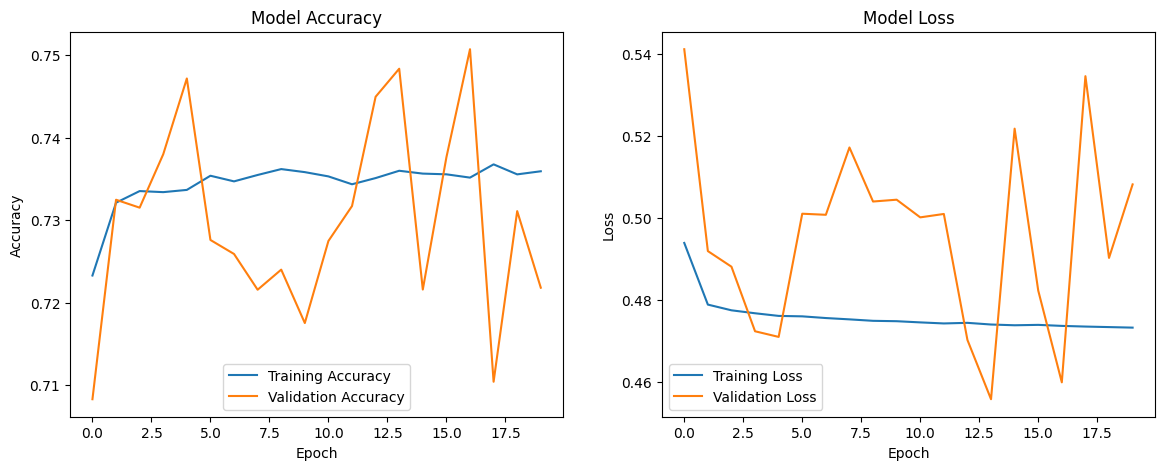

In [12]:
# Import necessary library for plotting
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()

### Analysis of Training and Validation Performance (Pre-Evaluation)

#### Accuracy Plot
- **Training Accuracy**: The training accuracy stabilizes around 72-73% across epochs, suggesting that the model is consistently learning patterns in the training data.
- **Validation Accuracy**: The validation accuracy fluctuates more than the training accuracy, ranging between 70% and 75%. This variability indicates that the model’s performance on the validation data is less stable, possibly due to noise or slight overfitting.

**Conclusion**: The training and validation accuracies are close in range, which is a positive sign, as it suggests the model is not significantly overfitting. However, the fluctuations in validation accuracy indicate that the model might be sensitive to specific features or examples in the validation set, leading to inconsistent performance on unseen data.

#### Loss Plot
- **Training Loss**: The training loss consistently decreases over epochs, indicating that the model is successfully minimizing error on the training data.
- **Validation Loss**: The validation loss shows substantial fluctuations across epochs, with peaks and troughs. This variability suggests that the model has difficulty generalizing to the validation data, likely due to noise or overfitting in some parts of the dataset.

**Conclusion**: The decreasing training loss and fluctuating validation loss indicate that the model is learning well on the training data but struggles with consistent performance on validation data. This could be due to minor overfitting, as the model appears to fit the training data better than the validation set.

---

### Overall Summary
The model is learning effectively on the training set, as indicated by the stable training accuracy and steadily decreasing training loss. However, the variability in validation accuracy and loss suggests that the model's generalization to new data is inconsistent. These results indicate that further tuning (e.g., regularization or early stopping) may improve the model's ability to perform more reliably on unseen data.


### Step 8: Evaluating the Model on the Test Set

Now that we’ve trained the model and confirmed it performs well on both training and validation data, we’ll evaluate its performance on the **test set**. This gives us an unbiased measure of how well the model is likely to perform on new, unseen data.

#### Explanation
- **`model.evaluate(X_test, y_test)`**: This function evaluates the model on the test set, returning the test loss and accuracy.
- **Test Accuracy**: This represents the proportion of correct predictions on the test set.
- **Test Loss**: This indicates the model’s error on the test set. Lower loss values are better, as they indicate closer alignment between predictions and actual values.

#### Code for Model Evaluation on Test Set:

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.7248
Test Loss: 0.5075



### Step 9: Plotting Test Accuracy and Loss

To visualize the test accuracy and loss, we can extend our previous accuracy and loss plots by adding the final test accuracy and loss as horizontal lines.

#### Explanation
- **Horizontal Lines**: The `axhline` function is used to add the test accuracy and loss as horizontal dashed lines in red, making it easy to compare them with the training and validation curves.
  - **Test Accuracy Line**: This line shows where the test accuracy falls relative to training and validation accuracy.
  - **Test Loss Line**: Similarly, this line indicates the test loss in comparison to training and validation loss.


#### Code for Plotting Test Accuracy and Loss:

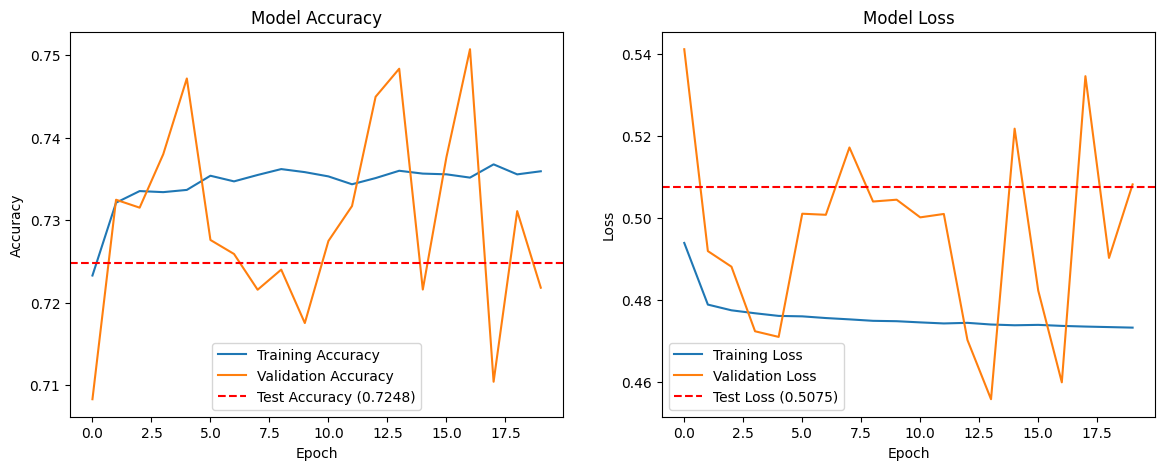

In [14]:
# Plot training & validation accuracy values with test accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy ({test_accuracy:.4f})')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss ({test_loss:.4f})')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()

### Analysis of Training, Validation, and Test Accuracy and Loss

#### Accuracy Plot
- **Training Accuracy**: The training accuracy stabilizes around 72-73%, indicating that the model is consistently learning patterns in the training data.
- **Validation Accuracy**: The validation accuracy fluctuates between 70% and 75%, showing more variability than the training accuracy. This suggests the model’s performance on unseen validation data is slightly less stable but remains close to training accuracy, indicating minimal overfitting.
- **Test Accuracy**: The test accuracy, represented by the red dashed line, is 72.48%, aligning closely with the training and validation accuracies. This shows that the model generalizes well to completely unseen data, performing consistently across training, validation, and test sets.

**Conclusion**: The close alignment between training, validation, and test accuracies indicates that the model has strong generalization capabilities. The slight fluctuations in validation accuracy suggest some sensitivity to the validation data, but overall, the model performs reliably on all datasets.

#### Loss Plot
- **Training Loss**: The training loss consistently decreases over epochs, showing that the model is effectively minimizing errors on the training data.
- **Validation Loss**: The validation loss shows more fluctuation than the training loss, with peaks and drops across epochs. This variability might indicate some sensitivity to specific data points or noise in the validation set.
- **Test Loss**: The test loss, marked by the red dashed line, is 0.5075. This value is close to the validation loss, indicating that the model performs similarly on completely unseen data as it does on validation data.

**Conclusion**: The decreasing training loss and close alignment between validation and test loss values suggest that the model is learning effectively and generalizes well to new data. The fluctuations in validation loss indicate slight sensitivity to validation data variations but do not significantly impact the model’s stability on test data.



### Step 10: Detailed Evaluation with Classification Report and Confusion Matrix

The **classification report** provides key metrics for each class:
- **Precision**: The accuracy of positive predictions (heart disease cases correctly identified out of all predicted as heart disease).
- **Recall (Sensitivity)**: The ability to correctly identify all positive cases (heart disease cases correctly identified out of all actual heart disease cases).
- **F1 Score**: The harmonic mean of precision and recall, providing a balanced measure.
  
The **confusion matrix** shows the counts of correct and incorrect predictions for each class:
- **True Positives (TP)**: Heart disease cases correctly identified.
- **True Negatives (TN)**: Non-heart disease cases correctly identified.
- **False Positives (FP)**: Non-heart disease cases incorrectly identified as heart disease.
- **False Negatives (FN)**: Heart disease cases incorrectly identified as non-heart disease.

#### Explanation
- **`model.predict(X_test) > 0.5`**: This generates probabilities, and we set a threshold of 0.5 to classify results as 1 (heart disease) or 0 (no heart disease).
- **`classification_report`**: This function prints the precision, recall, and F1-score for each class.
- **`confusion_matrix`**: This function outputs the counts for TP, TN, FP, and FN.

#### Interpretation
- The **classification report** helps you see how well the model performs for each class in terms of precision, recall, and F1-score.
- The **confusion matrix** visually shows the number of correct and incorrect predictions, giving insight into where the model might be making mistakes.

#### Code for Classification Report and Confusion Matrix:


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.98      0.71      0.82     45968
   Heart Disease       0.23      0.83      0.36      4768

        accuracy                           0.72     50736
       macro avg       0.60      0.77      0.59     50736
    weighted avg       0.91      0.72      0.78     50736

Confusion Matrix:
[[32799 13169]
 [  792  3976]]


### Step 11: Plotting the Confusion Matrix

The confusion matrix shows the model’s performance on each class in a grid, making it easy to see where the model might be making errors.

#### Explanation
- **`confusion_matrix(y_test, y_pred)`**: Creates the confusion matrix from the true labels (`y_test`) and predicted labels (`y_pred`).
- **`sns.heatmap`**: Plots the confusion matrix as a heatmap with counts annotated (`annot=True`) for each cell.
- **`xticklabels` and `yticklabels`**: Label the x and y axes for clarity, showing which classes are represented.

#### Code to Plot the Confusion Matrix:

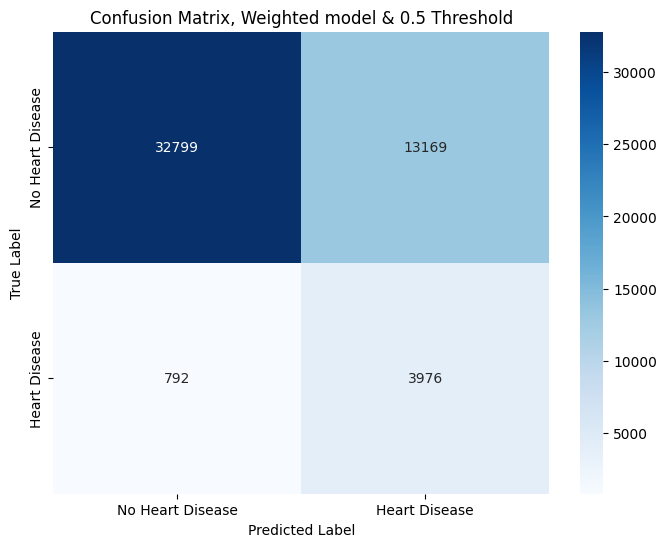

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix, Weighted model & 0.5 Threshold')
plt.show()

### Analysis of the Selected Model: Weighted Model with 0.5 Threshold

The selected model, **Weighted Model with 0.5 Threshold**, was chosen for its balanced performance in a medical screening context. This model was trained with class weights to address class imbalance, which helped improve its ability to detect heart disease cases. Here’s a breakdown of its performance:

- **Confusion Matrix**:
  - **True Negatives (TN)**: 32,799
  - **False Positives (FP)**: 13,169
  - **False Negatives (FN)**: 792
  - **True Positives (TP)**: 3,976

- **Classification Report**:
  - **Precision**: 0.98 for "No Heart Disease" and 0.23 for "Heart Disease"
  - **Recall (Sensitivity)**: 0.71 for "No Heart Disease" and 0.83 for "Heart Disease"
  - **F1-Score**: 0.82 for "No Heart Disease" and 0.36 for "Heart Disease"
  - **Overall Accuracy**: 72%

#### Key Points:
- **High Sensitivity (83%) for Heart Disease**: This model captures the majority of heart disease cases, <u>**minimizing the number of false negatives to 792. This is critical in a medical screening scenario, where missing a true positive (someone with heart disease) can have serious consequences.**</u>
- **Moderate Specificity (71%) for No Heart Disease**: Although the model has a higher number of false positives (13,169), this is acceptable in a medical context. Screening more people who may not have heart disease is a safer trade-off if it means catching more true cases.
- **Balanced Trade-off**: The slight increase in false positives is worth it for the gain in sensitivity, ensuring that fewer true cases are missed. This balance makes the model well-suited for medical use, where minimizing false negatives is usually prioritized over reducing false positives.

---

### Comparison with Alternative Models

I also evaluated two other models in separate notebooks to explore different approaches to balance sensitivity and specificity.

1. **No Weights & 0.5 Threshold**
   - **Confusion Matrix**:
     - True Negatives (TN): 45,738
     - False Positives (FP): 230
     - False Negatives (FN): 4,427
     - True Positives (TP): 341
   - **Classification Report**:
     - **Precision**: 0.91 for "No Heart Disease" and 0.60 for "Heart Disease"
     - **Recall**: 0.99 for "No Heart Disease" and 0.07 for "Heart Disease"
     - **Overall Accuracy**: 91%
   - **Analysis**:
     - This model has very high specificity (99%) with only 230 false positives. However, it has low sensitivity for heart disease, with a recall of only 7%, meaning it misses most heart disease cases (4,427 false negatives). This makes it unsuitable for medical screening, where detecting true cases is crucial.

2. **Weighted Model & 0.6 Threshold**
   - **Confusion Matrix**:
     - True Negatives (TN): 36,604
     - False Positives (FP): 9,364
     - False Negatives (FN): 1,282
     - True Positives (TP): 3,486
   - **Classification Report**:
     - **Precision**: 0.97 for "No Heart Disease" and 0.27 for "Heart Disease"
     - **Recall**: 0.80 for "No Heart Disease" and 0.73 for "Heart Disease"
     - **Overall Accuracy**: 79%
   - **Analysis**:
     - This model achieves a better balance, with improved sensitivity (73%) for heart disease cases and reasonable specificity (80%). It has fewer false positives than the selected model but more false negatives (1,282). While this balance could be suitable in some scenarios, it still misses more heart disease cases than the chosen model.

---

### Final Conclusion

The **Weighted Model with 0.5 Threshold** was selected because it provides the best balance between sensitivity and specificity for a medical screening context. This model minimizes the number of false negatives, ensuring that the majority of heart disease cases are detected (83% sensitivity). Although it has a higher number of false positives, this trade-off <u>**is more acceptable in healthcare, where the risk of missing a true positive is greater than the inconvenience of false positives.**</u>

Therefore, the **Weighted Model with 0.5 Threshold** is the optimal choice for this application.


### Step 12: Plotting the ROC Curve

The **Receiver Operating Characteristic (ROC) curve** shows the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate** at different classification thresholds. The area under the ROC curve (AUC) provides a single metric that summarizes the model’s ability to distinguish between classes.

#### Explanation
- **`model.predict(X_test)`**: Generates predicted probabilities for the positive class (heart disease).
- **`roc_curve(y_test, y_pred_prob)`**: Computes the false positive rate (`fpr`), true positive rate (`tpr`), and thresholds.
- **`auc(fpr, tpr)`**: Calculates the area under the curve (AUC), a single value summarizing the ROC curve.

#### Code to Plot the ROC Curve:

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step


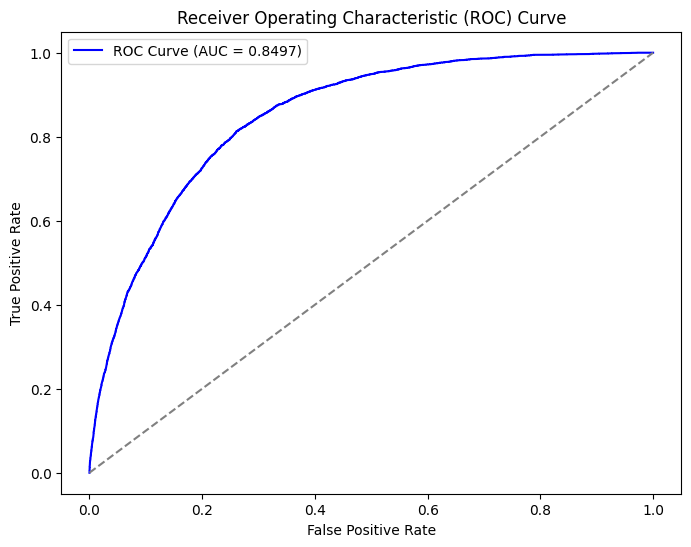

In [21]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (heart disease)
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

### ROC Curve Analysis

The **ROC (Receiver Operating Characteristic) Curve** is a graphical representation of the model’s performance across different classification thresholds. The curve plots the **True Positive Rate (Sensitivity)** against the **False Positive Rate**.

- **AUC (Area Under the Curve)**: The AUC value is 0.8497, which indicates that the model has a good ability to distinguish between the positive (heart disease) and negative (no heart disease) classes. An AUC closer to 1 represents a model with excellent discrimination, while an AUC of 0.5 would indicate no discriminative power.

- **Interpretation**: An AUC of 0.8497 suggests that there is an 84.97% chance that the model will correctly distinguish a randomly chosen positive instance from a randomly chosen negative instance. This indicates that the model is effective for this binary classification task and performs well in distinguishing cases with heart disease from those without.

**Conclusion**: The ROC curve and AUC value indicate that the model has strong discriminatory power, making it suitable for use in a screening context where correctly identifying cases is crucial.


